<a href="https://colab.research.google.com/github/yongguang-Zhang/MiCroDential_2022/blob/Mini-Project/Loan_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries

In [1]:
!pip install --upgrade scikit-learn==0.20.3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/loan_data.csv')

In [4]:
df.head()

credit.policy             purpose  ...  pub.rec  not.fully.paid
0              1  debt_consolidation  ...        0               0
1              1         credit_card  ...        0               0
2              1  debt_consolidation  ...        0               0
3              1  debt_consolidation  ...        0               0
4              1         credit_card  ...        0               0

[5 rows x 14 columns]

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

credit.policy     int.rate  ...      pub.rec  not.fully.paid
count    9578.000000  9578.000000  ...  9578.000000     9578.000000
mean        0.804970     0.122640  ...     0.062122        0.160054
std         0.396245     0.026847  ...     0.262126        0.366676
min         0.000000     0.060000  ...     0.000000        0.000000
25%         1.000000     0.103900  ...     0.000000        0.000000
50%         1.000000     0.122100  ...     0.000000        0.000000
75%         1.000000     0.140700  ...     0.000000        0.000000
max         1.000000     0.216400  ...     5.000000        1.000000

[8 rows x 13 columns]

## Drop Unused columns

In [7]:
data = df.drop(columns=['credit.policy', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],axis=1)

In [8]:
data.head()

purpose  int.rate  ...  revol.bal  revol.util
0  debt_consolidation    0.1189  ...      28854        52.1
1         credit_card    0.1071  ...      33623        76.7
2  debt_consolidation    0.1357  ...       3511        25.6
3  debt_consolidation    0.1008  ...      33667        73.2
4         credit_card    0.1426  ...       4740        39.5

[5 rows x 9 columns]

## Visulize some data

Text(0, 0.5, '')

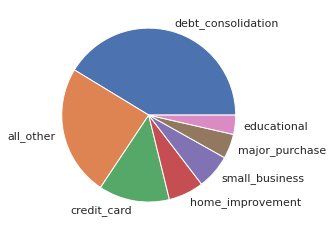

In [9]:
# Visulize 'purpose' column
data['purpose'].value_counts().plot.pie()
plt.ylabel('')

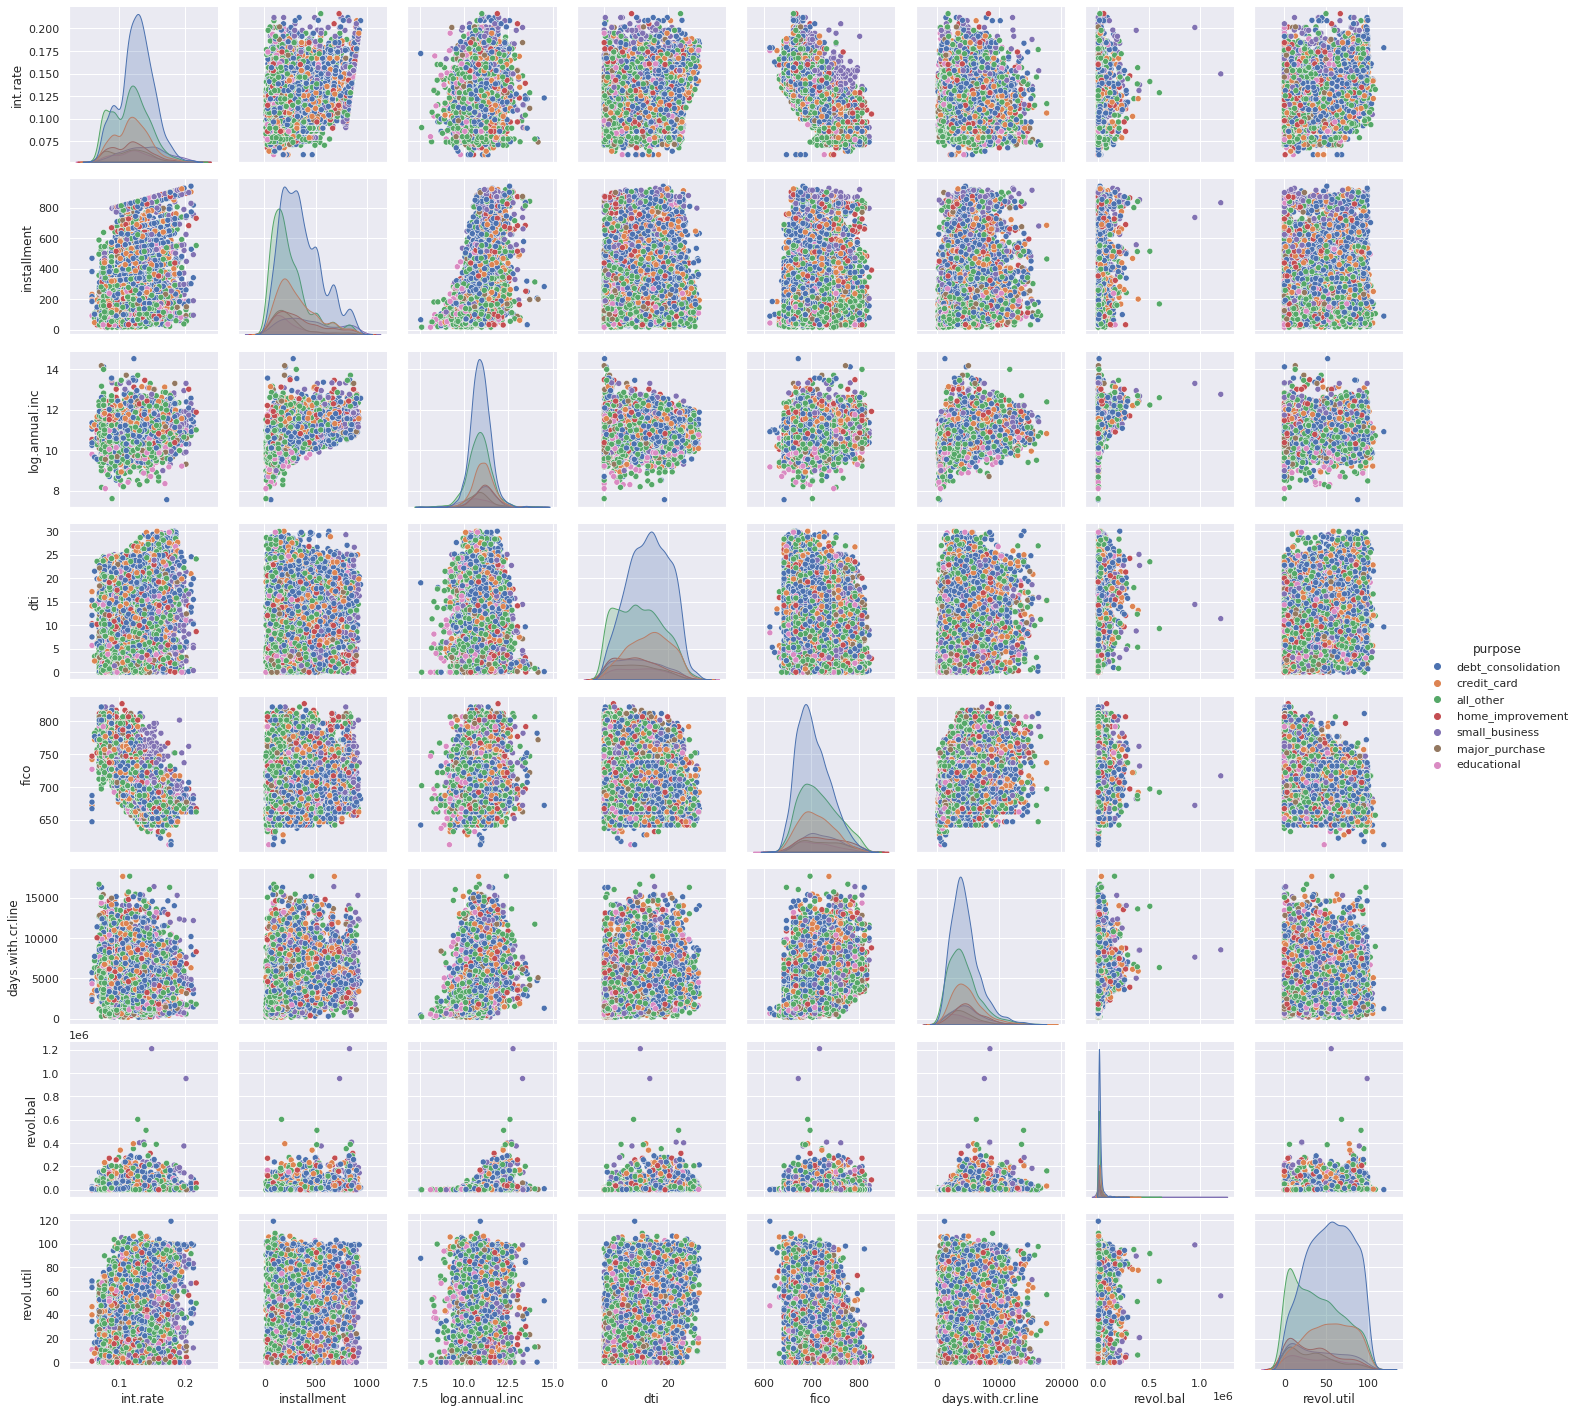

In [10]:
# To see general situation of the data
sns.pairplot(data,hue='purpose')

# Decision Tree

## Split the Data

In [11]:
from sklearn.model_selection import train_test_split
X = data.drop('purpose',axis=1)
y = data['purpose']
# random_state = 50: Make sure split same set of data each time
# stratify = data['purpose']: split the data according to the proportion of data['purpose']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=50,stratify=data['purpose'])

## Create and Train Model

In [12]:
from sklearn.tree import DecisionTreeClassifier
dect = DecisionTreeClassifier()

In [13]:
dect.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
prediction = dect.predict(X_test)
prediction

array(['debt_consolidation', 'debt_consolidation', 'educational', ...,
       'all_other', 'debt_consolidation', 'debt_consolidation'],
      dtype=object)

## Performance of the Model

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

### Classification Report

In [16]:
print(classification_report(y_test,prediction))

                    precision    recall  f1-score   support

         all_other       0.31      0.30      0.31       699
       credit_card       0.16      0.15      0.16       379
debt_consolidation       0.49      0.49      0.49      1187
       educational       0.05      0.06      0.05       103
  home_improvement       0.12      0.12      0.12       189
    major_purchase       0.06      0.06      0.06       131
    small_business       0.21      0.22      0.21       186

         micro avg       0.32      0.32      0.32      2874
         macro avg       0.20      0.20      0.20      2874
      weighted avg       0.33      0.32      0.32      2874



### Confusion Matrix

In [17]:
print(confusion_matrix(y_test,prediction))

[[209  81 224  37  56  49  43]
 [ 77  58 176  13  21  17  17]
 [232 159 583  40  64  42  67]
 [ 35  13  33   6   5   6   5]
 [ 41  21  70   7  23  12  15]
 [ 42  12  37   9  12   8  11]
 [ 34  24  62   6  14   5  41]]


### Model Score

In [18]:
print('Decision Tree Model Score is:',round(dect.score(X_test,y_test),2))

Decision Tree Model Score is: 0.32


## Visualize the tree

In [19]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(data.columns.drop('purpose'))
features

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util']

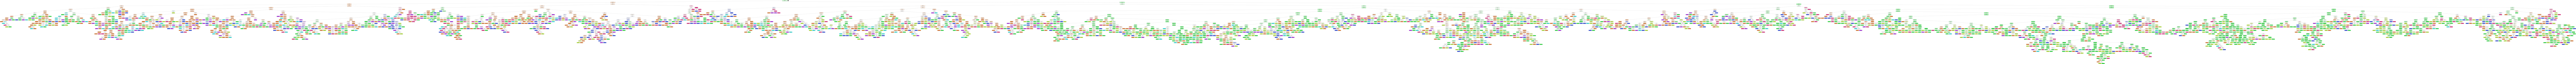

In [20]:
dot_data = StringIO()  
export_graphviz(dect, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

# Random Forests

## Create and Train the Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators: trees in forests
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Performance of the Model

In [22]:
prediction1 = rfc.predict(X_test)
prediction1

array(['all_other', 'debt_consolidation', 'all_other', ..., 'all_other',
       'debt_consolidation', 'all_other'], dtype=object)

### Classfication Report

In [23]:
print(classification_report(y_test,prediction1))

                    precision    recall  f1-score   support

         all_other       0.41      0.54      0.47       699
       credit_card       0.28      0.06      0.10       379
debt_consolidation       0.52      0.79      0.63      1187
       educational       0.12      0.01      0.02       103
  home_improvement       0.32      0.05      0.08       189
    major_purchase       0.00      0.00      0.00       131
    small_business       0.51      0.12      0.19       186

         micro avg       0.48      0.48      0.48      2874
         macro avg       0.31      0.22      0.21      2874
      weighted avg       0.41      0.48      0.40      2874



### Confusion Matrix

In [24]:
print(confusion_matrix(y_test,prediction1))


[[375  11 293   7   4   2   7]
 [ 83  23 271   0   0   0   2]
 [203  31 938   0   8   2   5]
 [ 52   3  47   1   0   0   0]
 [ 74   5  93   0   9   2   6]
 [ 65   3  60   0   2   0   1]
 [ 52   7 100   0   5   0  22]]


### Model Score

In [25]:
print('Random Forests Model Score is: ',round(rfc.score(X_test,y_test),2))

Random Forests Model Score is:  0.48


# KNN

## EDA

In [26]:
data.head()

purpose  int.rate  ...  revol.bal  revol.util
0  debt_consolidation    0.1189  ...      28854        52.1
1         credit_card    0.1071  ...      33623        76.7
2  debt_consolidation    0.1357  ...       3511        25.6
3  debt_consolidation    0.1008  ...      33667        73.2
4         credit_card    0.1426  ...       4740        39.5

[5 rows x 9 columns]

In [27]:
data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [28]:
def convert_To_numeric(x):
  if x == 'debt_consolidation':
    return 0
  elif x == 'credit_card':
    return 1
  elif x == "all_other":
    return 2
  elif x == 'home_improvement':
    return 3
  elif x == 'small_business':
    return 4
  elif x == 'major_purchase':
    return 5
  else:
    return 6

In [29]:
data['purpose'] = data['purpose'].apply(convert_To_numeric)


In [30]:
data.head()

purpose  int.rate  installment  ...  days.with.cr.line  revol.bal  revol.util
0        0    0.1189       829.10  ...        5639.958333      28854        52.1
1        1    0.1071       228.22  ...        2760.000000      33623        76.7
2        0    0.1357       366.86  ...        4710.000000       3511        25.6
3        0    0.1008       162.34  ...        2699.958333      33667        73.2
4        1    0.1426       102.92  ...        4066.000000       4740        39.5

[5 rows x 9 columns]

## Normalize the Data

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(data.drop('purpose',axis=1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
scaled_data = scaler.transform(data.drop('purpose',axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [35]:
data_scaled = pd.DataFrame(scaled_data,columns=data.columns.drop('purpose'))

In [36]:
data_scaled.head()

int.rate  installment  ...  revol.bal  revol.util
0 -0.139318     2.463099  ...   0.353732    0.182704
1 -0.578868    -0.438854  ...   0.495018    1.030602
2  0.486484     0.230708  ...  -0.397073   -0.730683
3 -0.813544    -0.757022  ...   0.496321    0.909966
4  0.743509    -1.043992  ...  -0.360663   -0.251586

[5 rows x 8 columns]

## Split the data 

In [37]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(data_scaled,data['purpose'],test_size=0.3,random_state=50,stratify=data['purpose'])

## Create and Train the Model

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier(n_neighbors=40)

In [67]:
knn.fit(X_train1,y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=40, p=2,
           weights='uniform')

In [68]:
prediction1 = knn.predict(X_test1)
prediction1

array([0, 0, 0, ..., 0, 0, 2])

## Performance of the Model

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

### Classification Report

In [70]:
print(classification_report(y_test1,prediction1))

              precision    recall  f1-score   support

           0       0.47      0.88      0.62      1187
           1       0.18      0.01      0.02       379
           2       0.39      0.33      0.36       699
           3       0.33      0.02      0.03       189
           4       0.77      0.09      0.16       186
           5       0.00      0.00      0.00       131
           6       0.00      0.00      0.00       103

   micro avg       0.45      0.45      0.45      2874
   macro avg       0.31      0.19      0.17      2874
weighted avg       0.39      0.45      0.36      2874



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Confusion Matrix 

In [71]:
print(confusion_matrix(y_test1,prediction1))

[[1050    7  129    1    0    0    0]
 [ 331    4   43    0    1    0    0]
 [ 453    7  233    3    3    0    0]
 [ 122    2   62    3    0    0    0]
 [ 132    1   34    2   17    0    0]
 [  72    1   57    0    1    0    0]
 [  63    0   40    0    0    0    0]]


### Model Score

In [72]:
print('KNN Model Score is:',round(knn.score(X_test1,y_test1),2))

KNN Model Score is: 0.45


## Visualize KNN Model

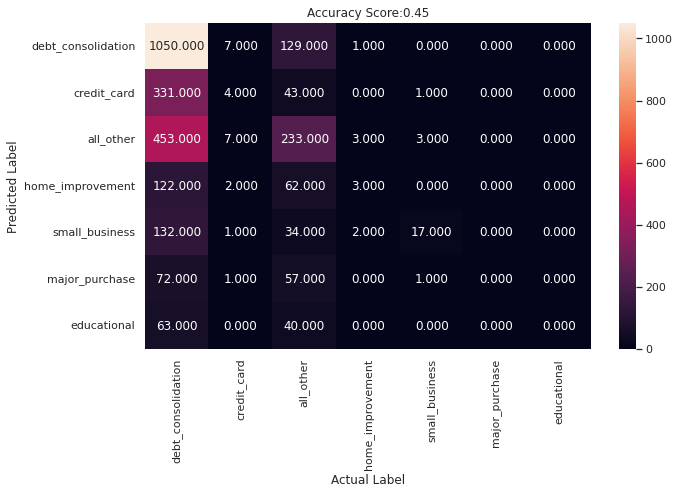

In [74]:
TickLabel = ['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational']
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test1,prediction1),annot=True,fmt='.3f',xticklabels=TickLabel,yticklabels=TickLabel)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
all_sample_title = f"Accuracy Score:{round(knn.score(X_test1,y_test1),2)}"
plt.title(all_sample_title,size=12)
plt.show()

## Visulize K Value with a range of kneighbors

In [47]:
from sklearn import metrics

In [48]:
k_value = []

In [49]:
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train1,y_train1)
  y_pred = knn.predict(X_test1)
  k_value.append(metrics.accuracy_score(y_test1,y_pred))

Text(0, 0.5, 'Accuracy Score')

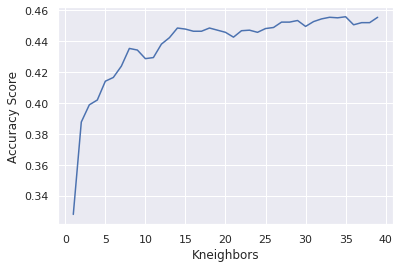

In [50]:
plt.plot(range(1,40),k_value)
plt.xlabel('Kneighbors')
plt.ylabel('Accuracy Score')

## Visulize Error Rate with a range of neighbors

In [51]:
error_rate = []

In [52]:
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train1,y_train1)
  prediction2 = knn.predict(X_test1)
  error_rate.append(np.mean(prediction2 != y_test1))

Text(0, 0.5, 'Error Rate')

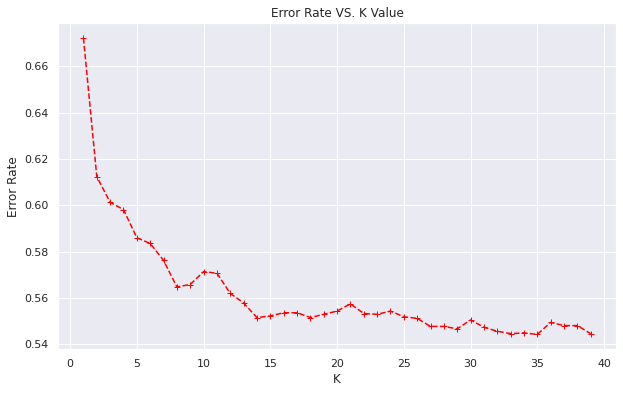

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red',linestyle='dashed',marker='+')
plt.title('Error Rate VS. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Logistic Regression

## Use same set Data as KNN Model

In [54]:
data.head()

purpose  int.rate  installment  ...  days.with.cr.line  revol.bal  revol.util
0        0    0.1189       829.10  ...        5639.958333      28854        52.1
1        1    0.1071       228.22  ...        2760.000000      33623        76.7
2        0    0.1357       366.86  ...        4710.000000       3511        25.6
3        0    0.1008       162.34  ...        2699.958333      33667        73.2
4        1    0.1426       102.92  ...        4066.000000       4740        39.5

[5 rows x 9 columns]

## Create and Train the Model

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel = LogisticRegression()

In [57]:
logmodel.fit(X_train1,y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
prediction3 = logmodel.predict(X_test1)
prediction3

array([0, 0, 2, ..., 0, 0, 0])

## Performance of the Model

### Classification Report

In [59]:
print(classification_report(y_test1,prediction3))

              precision    recall  f1-score   support

           0       0.49      0.83      0.61      1187
           1       0.14      0.00      0.01       379
           2       0.37      0.40      0.38       699
           3       0.18      0.01      0.02       189
           4       0.43      0.16      0.24       186
           5       0.00      0.00      0.00       131
           6       0.00      0.00      0.00       103

   micro avg       0.45      0.45      0.45      2874
   macro avg       0.23      0.20      0.18      2874
weighted avg       0.35      0.45      0.36      2874



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Confusion Matrix

In [60]:
print(confusion_matrix(y_test1,prediction3))

[[987   1 183   2  14   0   0]
 [299   1  75   0   4   0   0]
 [401   4 279   4  11   0   0]
 [102   0  80   2   5   0   0]
 [115   1  37   3  30   0   0]
 [ 67   0  61   0   3   0   0]
 [ 61   0  40   0   2   0   0]]


### Visulize Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.45')

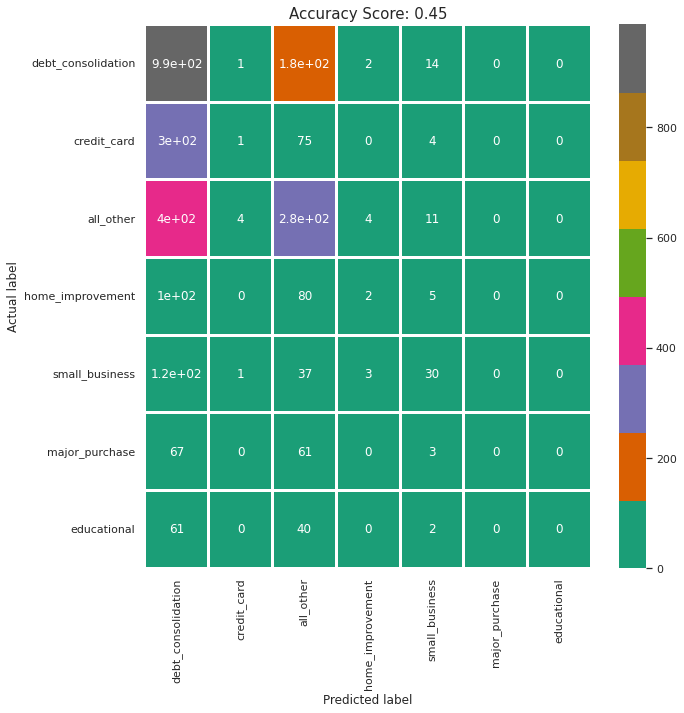

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test1,prediction3),annot=True,linewidths=2,cmap='Dark2',xticklabels=TickLabel,yticklabels=TickLabel)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(logmodel.score(X_test1, y_test1),2))
plt.title(all_sample_title, size = 15)

In [63]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [64]:
y_train1

1884    1
8296    4
7237    1
7124    0
7182    2
       ..
9176    0
3908    0
9073    2
8358    2
3381    2
Name: purpose, Length: 6704, dtype: int64

### Model Score

In [65]:
print('Logistic Regression Model Score is:',round(logmodel.score(X_test1, y_test1),2))

Logistic Regression Model Score is: 0.45
